# **Download Libraries**

In [6]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-8r1qb_y1
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-8r1qb_y1
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=a7f871d8eff24d8d013c129773e8c5d52a89017a3b83bdfdcdaf7dd3875194d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-_3bj4u2q/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [2]:
!pip install h5py

# **Import Libraries**

In [2]:
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects

In [7]:
from tensorflow import keras
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.losses import KLDivergence
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot

In [9]:
from os import listdir
from numpy import asarray
from numpy import vstack
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import savez_compressed
from numpy import load
import matplotlib.pyplot as plt 
import cv2

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5161.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_4769.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_1443.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5261.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/Tuberculosis-392.jpg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_5266.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_2134.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_991.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/test_0_1548.jpeg
/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis/Tuberculosis-176.jpg
/ka

# **Load X-ray Images**

In [85]:
# load all images in a directory into memory
def load_images(path, size=(256, 256)):
    image_list = list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # store
        image_list.append(pixels)
    return asarray(image_list)

# **Data Augmentation I: Contrast Limiting Histogram Equalization to Control Different Brightness over X-ray images**

In [72]:
def clahe(img): 
    clahe = cv2.createCLAHE(clipLimit=1.8, tileGridSize=(8,8))
    for i in range(len(img)):
        grayimg = cv2.cvtColor(img[i].astype('uint8'), cv2.COLOR_BGR2GRAY)
        grayimg = clahe.apply(grayimg)
        img[i] = cv2.cvtColor(grayimg, cv2.COLOR_GRAY2BGR)
    return img
        

In [8]:
# Load normal X-ray images
path_normal = '../input/lungs-disease-dataset-4-types/Lung Disease Dataset/train/Normal/'
data_normal = load_images(path_normal)
print('Successfully Loaded normal X-ray imageset: ', data_normal.shape)

Successfully Loaded normal X-ray imageset:  (1207, 256, 256, 3)


In [9]:
# Load X-ray images of patients with Bacterial Pneumonia
path_tub = '../input/lungs-disease-dataset-4-types/Lung Disease Dataset/train/Bacterial Pneumonia/'
data_tub = load_images(path_tub)
print('Successfully Loaded X-ray images of tuberculosis patients: ', data_tub.shape)

Successfully Loaded X-ray images of tuberculosis patients:  (1205, 256, 256, 3)


In [86]:
path_normal_val = '../input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Normal/'
data_normal_val = load_images(path_normal_val)

In [87]:
path_tub_val = '../input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Bacterial Pneumonia/'
data_tub_val = load_images(path_tub_val)

In [18]:
data_normal_val_aug = clahe(data_normal_val)
data_tub_val_aug = clahe(data_tub_val)

In [10]:
data_normal_aug = clahe(data_normal)
data_tub_aug = clahe(data_tub)

# **Save X-ray Imageset**

In [ ]:
filename = 'x_ray.npz'
savez_compressed(filename, data_normal, data_tub)
print('Successfully Saved dataset: ', filename)

In [11]:
filename = 'x_ray_aug.npz'
savez_compressed(filename, data_normal_aug, data_tub_aug)
print('Successfully Saved dataset: ', filename)

Successfully Saved dataset:  x_ray_aug.npz


In [19]:
filename = 'x_ray_aug_val.npz'
savez_compressed(filename, data_normal_val_aug, data_tub_val_aug)
print('Successfully Saved dataset: ', filename)

Successfully Saved dataset:  x_ray_aug_val.npz


In [88]:
filename = 'x_ray_val.npz'
savez_compressed(filename, data_normal_val, data_tub_val)
print('Successfully Saved dataset: ', filename)

Successfully Saved dataset:  x_ray_val.npz


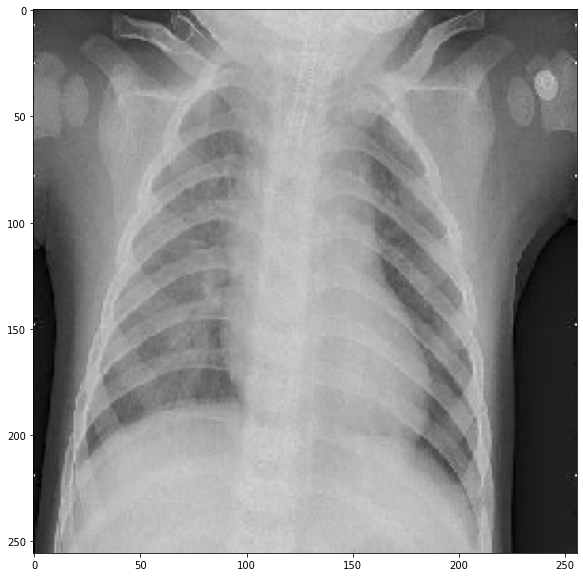

In [104]:
# load and plot the prepared dataset
# load the dataset
data = load(filename)
image_normal, image_tub = data['arr_0'], data['arr_1']
# plot source images
plt.figure(figsize = (10, 10))
plt.imshow(image_tub[1].astype('uint8'))

In [106]:
image_tub_aug = clahe(image_tub)

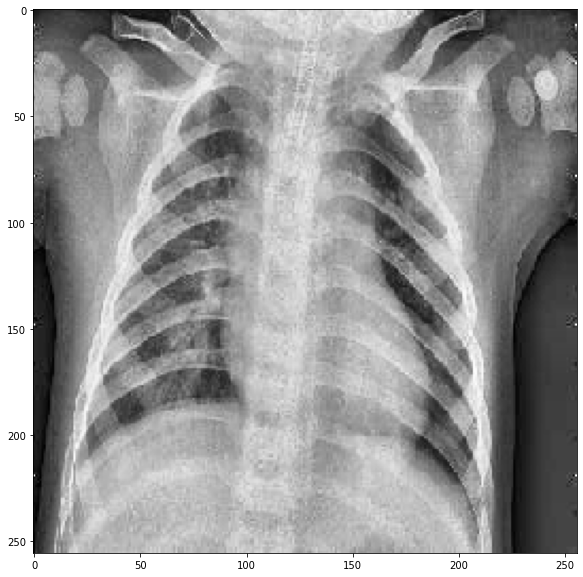

In [107]:
# plot source images
plt.figure(figsize = (10, 10))
plt.imshow(image_tub_aug[1].astype('uint8'))

# **Data Augmentation II: CycleGAN to Generate Contrasting Samples**

In [13]:
def define_discriminator(image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # source image input
    in_image = Input(shape=image_shape)
    # C64
    d = Conv2D(32, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
    d = LeakyReLU(alpha=0.3)(d)
    # C128
    d = Conv2D(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = LeakyReLU(alpha=0.3)(d)
    # C256
    d = Conv2D(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = LeakyReLU(alpha=0.3)(d)
    # C512
    d = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = LeakyReLU(alpha=0.3)(d)
    # second last output layer
    d = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = Activation('gelu')(d)
    # patch output
    patch_out = Conv2D(1, (3,3), padding='same', kernel_initializer=init)(d)
    # define model
    model = Model(in_image, patch_out)
    # compile model
    model.compile(loss='mse', optimizer=Adam(lr=0.0001, beta_1=0.5), loss_weights=[0.5])
    return model

In [14]:
# generator a resnet block
def resnet_block(n_filters, input_layer):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # first layer convolutional layer
    g = Conv2D(n_filters, (2,2), padding='same', kernel_initializer=init)(input_layer)
    g = InstanceNormalization(axis=-1)(g)
    g = Activation('swish')(g)
    # second convolutional layer
    g = Conv2D(n_filters, (2,2), padding='same', kernel_initializer=init)(g)
    g = InstanceNormalization(axis=-1)(g)
    # concatenate merge channel-wise with input layer
    g = Concatenate()([g, input_layer])
    return g

In [25]:
# define the standalone generator model
def define_generator(image_shape, n_resnet=6):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # c7s1-64
    conv_64 = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
    conv_64 = InstanceNormalization(axis=-1)(conv_64)
    conv_64 = Activation('swish')(conv_64)
    # d128
    conv_128 = Conv2D(128, (2,2), strides=(2,2), padding='valid', kernel_initializer=init)(conv_64)
    conv_128 = InstanceNormalization(axis=-1)(conv_128)
    conv_128 = Activation('swish')(conv_128)
    # d256
    conv_256 = Conv2D(256, (2,2), strides=(2,2), padding='valid', kernel_initializer=init)(conv_128)
    conv_256 = InstanceNormalization(axis=-1)(conv_256)
    conv_256 = Activation('swish')(conv_256)
    # u128
    for _ in range(n_resnet):
        conv_256 = resnet_block(256, conv_256)
    dconv_128 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='valid', kernel_initializer=init)(conv_256)
    uconv_128 = Concatenate()([conv_128, dconv_128])
    uconv_128 = InstanceNormalization(axis=-1)(uconv_128)
    uconv_128 = Activation('swish')(uconv_128)
    # u64
    dconv_64 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='valid', kernel_initializer=init)(uconv_128)
    uconv_64 = Concatenate()([conv_64, dconv_64])
    uconv_64 = InstanceNormalization(axis=-1)(uconv_64)
    uconv_64 = Activation('swish')(uconv_64)
    # c7s1-3
    uconv_64 = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(uconv_64)
    uconv_64 = InstanceNormalization(axis=-1)(uconv_64)
    out_image = Activation('tanh')(uconv_64)
    # define model
    model = Model(in_image, out_image)
    return model

In [31]:
# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
    # ensure the model we're updating is trainable
    g_model_1.trainable = True
    # mark discriminator as not trainable
    d_model.trainable = False
    # mark other generator model as not trainable
    g_model_2.trainable = False
    # discriminator element
    input_gen = Input(shape=image_shape)
    gen1_out = g_model_1(input_gen)
    output_d = d_model(gen1_out)
    # identity element
    input_id = Input(shape=image_shape)
    output_id = g_model_1(input_id)
    # forward cycle
    output_f = g_model_2(gen1_out)
    # backward cycle
    gen2_out = g_model_2(input_id)
    output_b = g_model_1(gen2_out)
    
    # define model graph
    model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
    # define optimization algorithm configuration
    opt = Adam(lr=0.001, beta_1=0.5)
    # compile model with weighting of least squares loss and L1 loss
    model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10, 5], optimizer=opt)
    return model

In [17]:
# load and prepare training images
def load_real_samples(filename):
    # load the dataset
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

In [18]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, patch_shape, patch_shape, 1))
    return X, y

In [19]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
    # generate fake instance
    X = g_model.predict(dataset)
    # create 'fake' class labels (0)
    y = zeros((len(X), patch_shape, patch_shape, 1))
    return X, y

In [20]:
# save the generator models to file
def save_models(step, g_model_AtoB, g_model_BtoA):
    filename1 = 'g_model_AtoB_%06d.h5' % (step+1)
    g_model_AtoB.save(filename1)
    filename2 = 'g_model_BtoA_%06d.h5' % (step+1)
    g_model_BtoA.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

In [21]:
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
    selected = list()
    for image in images:
        if len(pool) < max_size:
            # stock the pool
            pool.append(image)
            selected.append(image)
        elif random() < 0.5:
            # use image, but don't add it to the pool
            selected.append(image)
        else:
            # replace an existing image and use replaced image
            ix = randint(0, len(pool))
            selected.append(pool[ix])
            pool[ix] = image
    return asarray(selected)

In [22]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=5):
    # select a sample of input images
    X_in, _ = generate_real_samples(trainX, n_samples, 0)
    # generate translated images
    X_out, _ = generate_fake_samples(g_model, X_in, 0)
    # scale all pixels from [-1,1] to [0,1]
    X_in = (X_in + 1) / 2.0
    X_out = (X_out + 1) / 2.0
    # plot real images
    for i in range(n_samples):
        pyplot.subplot(2, n_samples, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X_in[i])
    # plot translated image
    for i in range(n_samples):
        pyplot.subplot(2, n_samples, 1 + n_samples + i)
        pyplot.axis('off')
        pyplot.imshow(X_out[i])
    # save plot to file
    filename1 = '%s_generated_plot_%06d.png'
    pyplot.savefig(filename1)
    pyplot.close()

In [33]:
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
    # define properties of the training run
    n_epochs, n_batch, = 30, 1
    # determine the output square shape of the discriminator
    n_patch = d_model_A.output_shape[1]
    # unpack dataset
    trainA, trainB = dataset
    # prepare image pool for fakes
    poolA, poolB = list(), list()
    # Make lists for storing previous generated images. 
    prev_x_fake_atob, prev_x_fake_btoa = list(), list()
    # the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # manually enumerate epochs
    for i in range(n_steps):
        # select a batch of real samples
        X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
        X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
        # generate a batch of fake samples
        X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
        X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
        # update fakes from pool
        X_fakeA = update_image_pool(poolA, X_fakeA)
        X_fakeB = update_image_pool(poolB, X_fakeB)
        # update generator B->A via adversarial and cycle loss
        g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
        # update discriminator for A -> [real/fake]
        dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
        dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
        # update generator A->B via adversarial and cycle loss
        g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
        # update discriminator for B -> [real/fake]
        dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
        dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
        if(i > 0) :
            d_model_A.train_on_batch(prev_x_fake_btoa, y_fakeA)
            d_model_B.train_on_batch(prev_x_fake_atob, y_fakeB) 
        prev_x_fake_atob = X_fakeB 
        prev_x_fake_btoa = X_fakeA
        # summarize performance
        print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
        # evaluate the model performance every so often
        if (i+1) % (bat_per_epo * 1) == 0:
            # plot A->B translation
            summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
        if (i+1) % (bat_per_epo * 5) == 0:
            # save the models
            save_models(i, g_model_AtoB, g_model_BtoA)

In [34]:
# load image data
dataset = load_real_samples('../input/xraydata/x_ray (4).npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

Loaded (1207, 256, 256, 3) (1205, 256, 256, 3)


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:184 __call__
        self.build(y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:133 build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/nest.py:869 map_structure
        structure[0], [func(*x) for x in entries],
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/nest.py:869 <listcomp>
        structure[0], [func(*x) for x in entries],
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:273 _get_loss_object
        loss = losses_mod.get(loss)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:2142 get
        f'Could not interpret loss function identifier: {identifier}')

    ValueError: Could not interpret loss function identifier: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='Placeholder:0', description="created by layer 'tf.cast_15'")


# **Evaluate with Pre-trained Models**

In [1]:
from keras.models import load_model
from numpy import expand_dims
import numpy as np 

In [8]:
from keras.applications.resnet import ResNet50 
from keras.models import Model 
from keras.layers import Dense 
from keras.layers import Flatten, Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [1]:
def load_image(filename, size=(256,256)):
    # load and resize the image
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # transform in a sample
    pixels = expand_dims(pixels, 0)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    return pixels

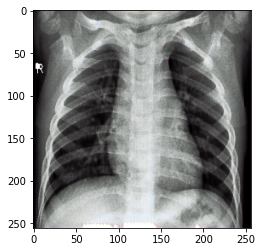

In [34]:
# load the image
image_src = load_image('../input/lungs-disease-dataset-4-types/Lung Disease Dataset/test/Normal/0105.jpeg')
# load the model
# translate image
image_tar = nb_aug_generator.predict(image_src)
# scale from [-1,1] to [0,1]
image_tar = (image_tar + 1) / 2.0
# plot the translated image
pyplot.imshow(image_tar[0])
pyplot.show()

In [10]:
def load_real_samples(filename):
    # load the dataset
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

**Load Validation Dataset**

In [66]:
norm_data, bac_data = load_real_samples('../input/xrayaugval/x_ray_aug_val.npz')

**Load Cyclic Generators**

In [67]:
cust = {'InstanceNormalization': InstanceNormalization}
nb_aug_generator = load_model('../input/normtobac-aug/NormtoBac_aug.h5', cust)

In [68]:
cust = {'InstanceNormalization': InstanceNormalization}
bn_aug_generator = load_model('../input/bactonorm-aug/BactoNorm_aug.h5', cust)

In [69]:
def select_sample(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    return X

**Translate the negative to positive samples, and vice versa**

In [72]:
selected_norm = select_sample(norm_data, 30)
norm_to_bac = nb_aug_generator.predict(selected_norm) 

In [73]:
selected_bac = select_sample(bac_data, 30)
bac_to_norm = bn_aug_generator.predict(selected_bac)

**Concatenate the validation imageset with the translated images to finalize augmentation**

In [74]:
bac_data_p = np.concatenate([bac_data, norm_to_bac], axis=0)
print('Before Adding Generated Samples: ' , bac_data.shape) 
print('After Adding Generated Samples: ' , bac_data_p.shape)

Before Adding Generated Samples:  (401, 256, 256, 3)
After Adding Generated Samples:  (431, 256, 256, 3)


In [75]:
norm_data_p = np.concatenate([norm_data, bac_to_norm], axis=0)
print('Before Adding Generated Samples: ' , norm_data.shape) 
print('After Adding Generated Samples: ' , norm_data_p.shape)

Before Adding Generated Samples:  (402, 256, 256, 3)
After Adding Generated Samples:  (432, 256, 256, 3)


In [76]:
#training set 
X = np.concatenate([bac_data, norm_data], axis=0)
y = np.concatenate([ones(bac_data.shape[0]), zeros(norm_data.shape[0])], axis=0)

In [77]:
X_p = np.concatenate([bac_data_p, norm_data_p], axis=0)
y_p = np.concatenate([ones(bac_data_p.shape[0]), zeros(norm_data_p.shape[0])], axis=0)

In [78]:
def scale(dataset):
    for i in range(len(dataset)): 
        dataset[i] = (dataset[i] + 1) / 2.0
    return dataset 

In [63]:
X = scale(X) 

In [79]:
X_p = scale(X_p)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

In [81]:
model = ResNet50(include_top=False, input_shape=(256, 256, 3), weights="imagenet") 
model.trainable = False
flat1 = Flatten()(model.layers[-1].output) 
class1 = Dropout(0.1)(flat1)
class1 = Dense(1024, activation='relu')(class1)
class1 = Dropout(0.1)(class1)
output = Dense(1, activation='sigmoid')(class1)
model = Model(inputs=model.inputs, outputs=output)
model_p = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [82]:
model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=0.007), metrics=['Accuracy'])
model_p.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=0.007), metrics=['Accuracy'])

In [83]:
history = model_p.fit(X_train, y_train, epochs=45, batch_size=50, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/45
14/14 [==============================] - 8s 323ms/step - loss: 171.6257 - Accuracy: 0.6304 - val_loss: 76.5844 - val_Accuracy: 0.7977
Epoch 2/45
14/14 [==============================] - 2s 168ms/step - loss: 30.1226 - Accuracy: 0.8812 - val_loss: 18.6585 - val_Accuracy: 0.9306
Epoch 3/45
14/14 [==============================] - 2s 168ms/step - loss: 14.4505 - Accuracy: 0.9391 - val_loss: 12.5488 - val_Accuracy: 0.9306
Epoch 4/45
14/14 [==============================] - 2s 165ms/step - loss: 8.0062 - Accuracy: 0.9319 - val_loss: 9.0281 - val_Accuracy: 0.9075
Epoch 5/45
14/14 [==============================] - 2s 165ms/step - loss: 3.7058 - Accuracy: 0.9319 - val_loss: 3.0895 - val_Accuracy: 0.9306
Epoch 6/45
14/14 [==============================] - 2s 165ms/step - loss: 2.0118 - Accuracy: 0.8899 - val_loss: 2.7923 - val_Accuracy: 0.8497
Epoch 7/45
14/14 [==============================] - 2s 171ms/step - loss: 2.8114 - Accuracy: 0.9130 - val_loss: 2.5810 - val_Accuracy: 0.9133

In [86]:
model_p.save('CLAHE+CycleGAN+ResNet_30.h5')

In [87]:
np.save('CLAHE+CycleGAN+Resnet_30.npy',history.history)

In [2]:
control_history=np.load('../input/resnet-history/Resnet.npy',allow_pickle='TRUE').item()

In [3]:
experimental_val_history=np.load('../input/clahe-cycleganresnet1415/clahe_cycleGanResNet_14_15.npy',allow_pickle='TRUE').item()

In [4]:
experimental_wc_history = np.load('../input/cycleganresnet/CycleGANResnet.npy', allow_pickle='TRUE').item()

In [94]:
experimental_val_history_30 = np.load('./CLAHE+CycleGAN+Resnet_30.npy', allow_pickle='TRUE').item()

In [21]:
min(experimental_val_history['val_loss'])

0.015547381713986397

In [22]:
min(experimental_wc_history['val_loss'])

0.1747632622718811

In [23]:
min(control_history['val_loss'])

0.1673974096775055

In [114]:
max(experimental_val_history_30['val_Accuracy'])

0.9421965479850769

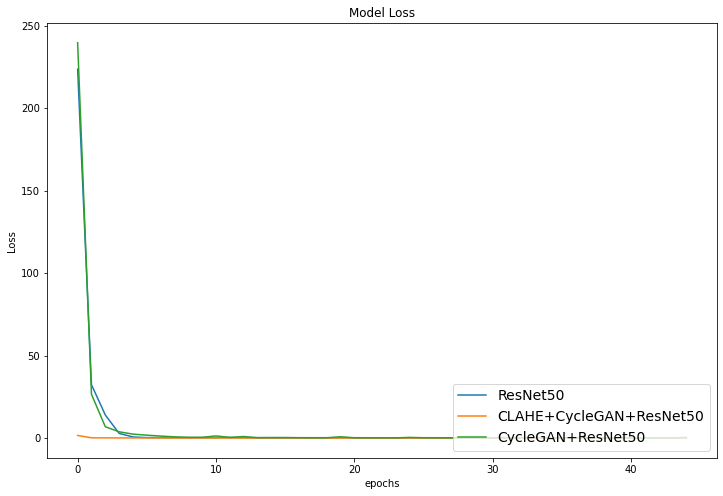

In [17]:
fig = plt.figure(figsize=(12,8))
plt.plot(control_history['loss'])
plt.plot(experimental_val_history['loss'])
plt.plot(experimental_wc_history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['ResNet50', 'CLAHE+CycleGAN+ResNet50', 'CycleGAN+ResNet50'], loc='lower right', fontsize=14)
plt.show()
fig.savefig('Model_Loss.jpg')

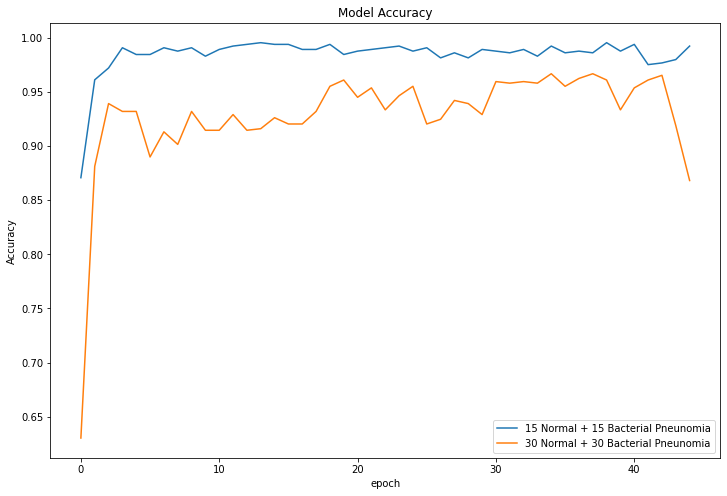

In [99]:
fig = plt.figure(figsize=(12,8))
plt.plot(experimental_val_history['Accuracy'])
plt.plot(experimental_val_history_30['Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['15 Normal + 15 Bacterial Pneunomia', '30 Normal + 30 Bacterial Pneunomia'], loc='lower right')
plt.show()
fig.savefig('Number of Augmented Samples_Accuracy Comparison')

In [3]:
control_model = load_model('../input/control-model/Control_Model.h5')

2022-07-30 10:32:50.702926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 10:32:50.794732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 10:32:50.795550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 10:32:50.797127: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
control_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [41]:
control_model = load_model('../input/control-model-val/Control_Model_Val (1).h5')
experimental_model = load_model('../input/experimental-augmented-model/Experimental_Augmented_Model.h5')

In [60]:
#load test set 
test_path_norm = '../input/lungs-disease-dataset-4-types/Lung Disease Dataset/test/Normal/'
test_norm = load_images(test_path_norm)
print('Successfully loaded test normal dataset!')

Successfully loaded test normal dataset!


In [61]:
test_path_bac = '../input/lungs-disease-dataset-4-types/Lung Disease Dataset/test/Bacterial Pneumonia/'
test_bac = load_images(test_path_bac)
print('Successfully loaded test bacterial pneumonia dataset!')

Successfully loaded test bacterial pneumonia dataset!


In [62]:
X_test = np.concatenate([test_norm, test_bac], axis=0) 
y_test = np.concatenate([zeros(test_norm.shape[0]), ones(test_bac.shape[0])])

In [63]:
y_preds = experimental_model.predict(X_test)

In [64]:
y_preds = decode_predictions(y_preds)

NameError: name 'decode_predictions' is not defined

In [66]:
control_model.evaluate(X_test, y_test, verbose=1)

26/26 [==============================] - 2s 72ms/step - loss: 2.5629 - Accuracy: 0.5006


[2.5629076957702637, 0.5006195902824402]